In [5]:
import pandas_datareader as pdr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
#defining required variables
PERIOD = 200
STARTING_BALANCE = 10000

In [7]:
#defining my time period
START = datetime.datetime(2001, 1, 1)
END = datetime.datetime(2021, 1, 1)
YEARS = (END - START).days / 365.25

In [8]:
#loading in the data into pandas dataframe
price = pdr.get_data_yahoo('^GSPC', START, END)
price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,1320.280029,1276.050049,1320.280029,1283.270020,1129400000,1283.270020
2001-01-03,1347.760010,1274.619995,1283.270020,1347.560059,1880700000,1347.560059
2001-01-04,1350.239990,1329.140015,1347.560059,1333.339966,2131000000,1333.339966
2001-01-05,1334.770020,1294.949951,1333.339966,1298.349976,1430800000,1298.349976
2001-01-08,1298.349976,1276.290039,1298.349976,1295.859985,1115500000,1295.859985


In [9]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2001-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5032 non-null   float64
 1   Low        5032 non-null   float64
 2   Open       5032 non-null   float64
 3   Close      5032 non-null   float64
 4   Volume     5032 non-null   int64  
 5   Adj Close  5032 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [10]:
#dropping columns not needed
price = price.drop(['High','Low','Volume','Adj Close'], 1)
price.head()

C:\Users\noye\AppData\Local\Temp/ipykernel_7300/2529706559.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  price = price.drop(['High','Low','Volume','Adj Close'], 1)


,Open,Close
Date,,
2001-01-02,1320.280029,1283.270020
2001-01-03,1283.270020,1347.560059
2001-01-04,1347.560059,1333.339966
2001-01-05,1333.339966,1298.349976
2001-01-08,1298.349976,1295.859985


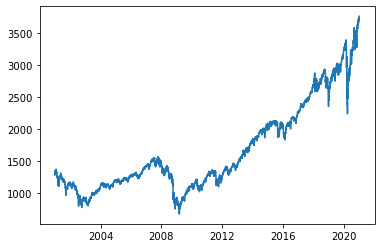

In [11]:
#plot a chart
plt.plot(price.Close)
plt.show()

In [12]:
#calculating the daily return and the cumulaive benchMark balance
price['Return'] = price.Close / price.Open
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()
price.tail()

,Open,Close,Return,Bench_Bal
Date,,,,
2020-12-24,3694.030029,3703.060059,1.002444,19049.074385
2020-12-28,3723.030029,3735.360107,1.003312,19112.161863
2020-12-29,3750.010010,3727.040039,0.993875,18995.093962
2020-12-30,3736.189941,3732.040039,0.998889,18973.995521
2020-12-31,3733.270020,3756.070068,1.006107,19089.874636


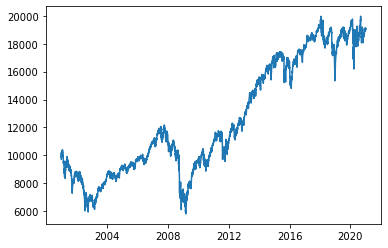

In [13]:
#plot a chart
plt.plot(price.Bench_Bal)
plt.show()

- The benchmark balance entry has the same look as the Close entry

In [14]:
#Calculating some metrics
bench_return = round(((price.Bench_Bal[-1] / price.Bench_Bal[0]) -1) *100, 2) # percentage of increase over 20yrs
bench_return 

96.4

In [15]:
#compounded annual growth rate
bench_cagr = round((((price.Bench_Bal[-1] / price.Bench_Bal[0]) ** (1/YEARS)) -1) *100, 2)
bench_cagr

3.43

In [16]:
price.head()

,Open,Close,Return,Bench_Bal
Date,,,,
2001-01-02,1320.280029,1283.270020,0.971968,9719.680606
2001-01-03,1283.270020,1347.560059,1.050099,10206.623055
2001-01-04,1347.560059,1333.339966,0.989448,10098.917928
2001-01-05,1333.339966,1298.349976,0.973758,9833.898467
2001-01-08,1298.349976,1295.859985,0.998082,9815.038905


In [17]:
#Calculating the drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak
bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)#maximum drawback
bench_dd

-52.29

In [18]:
#Calculating the moving Average
price['SMA'] = price.Close.rolling(window = PERIOD).mean()
price

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,SMA
Date,,,,,,,
2001-01-02,1320.280029,1283.270020,0.971968,9719.680606,9719.680606,0.000000,NaN
2001-01-03,1283.270020,1347.560059,1.050099,10206.623055,10206.623055,0.000000,NaN
2001-01-04,1347.560059,1333.339966,0.989448,10098.917928,10206.623055,-107.705127,NaN
2001-01-05,1333.339966,1298.349976,0.973758,9833.898467,10206.623055,-372.724588,NaN
2001-01-08,1298.349976,1295.859985,0.998082,9815.038905,10206.623055,-391.584150,NaN
...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.060059,1.002444,19049.074385,19966.075071,-917.000686,3209.924750
2020-12-28,3723.030029,3735.360107,1.003312,19112.161863,19966.075071,-853.913208,3215.046450
2020-12-29,3750.010010,3727.040039,0.993875,18995.093962,19966.075071,-970.981108,3221.751001


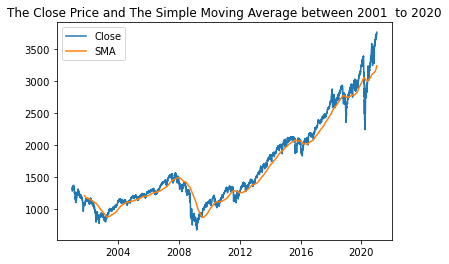

In [43]:
#plotting the close and sma data
plt.plot(price.Close, label = 'Close')
plt.plot(price.SMA, label = 'SMA')
plt.title('The Close Price and The Simple Moving Average between 2001  to 2020')
leg = plt.legend();
plt.show()

### looking for trades
- Trading rules:
    - Everytime the chart goes beyond the moving average, trades are taken
    - 

In [20]:
#creating entry signals
price['Long'] = price.Close > price.SMA
price.tail(4)

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,SMA,Long
Date,,,,,,,,
2020-12-28,3723.030029,3735.360107,1.003312,19112.161863,19966.075071,-853.913208,3215.046450,True
2020-12-29,3750.010010,3727.040039,0.993875,18995.093962,19966.075071,-970.981108,3221.751001,True
2020-12-30,3736.189941,3732.040039,0.998889,18973.995521,19966.075071,-992.079550,3227.765251,True
2020-12-31,3733.270020,3756.070068,1.006107,19089.874636,19966.075071,-876.200435,3234.555101,True


In [21]:
#Calculating the system daily return
price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1.0)
price.tail(10)

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,SMA,Long,Sys_Return
Date,,,,,,,,,
2020-12-17,3713.649902,3722.479980,1.002378,19087.623851,19966.075071,-878.451220,3186.617350,True,1.002378
2020-12-18,3722.389893,3709.409912,0.996513,19021.065271,19966.075071,-945.009799,3190.302549,True,0.996513
2020-12-21,3684.280029,3694.919922,1.002888,19075.996517,19966.075071,-890.078554,3195.044348,True,1.002888
2020-12-22,3698.080078,3687.260010,0.997074,19020.182802,19966.075071,-945.892268,3199.069498,True,0.997074
2020-12-23,3693.419922,3690.010010,0.999077,19002.622613,19966.075071,-963.452457,3203.812649,True,0.999077
2020-12-24,3694.030029,3703.060059,1.002444,19049.074385,19966.075071,-917.000686,3209.924750,True,1.002444
2020-12-28,3723.030029,3735.360107,1.003312,19112.161863,19966.075071,-853.913208,3215.046450,True,1.003312
2020-12-29,3750.010010,3727.040039,0.993875,18995.093962,19966.075071,-970.981108,3221.751001,True,0.993875
2020-12-30,3736.189941,3732.040039,0.998889,18973.995521,19966.075071,-992.079550,3227.765251,True,0.998889


In [23]:
#calculating the system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Return.cumprod()
price.tail()

,Open,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,SMA,Long,Sys_Return,Sys_Bal
Date,,,,,,,,,,
2020-12-24,3694.030029,3703.060059,1.002444,19049.074385,19966.075071,-917.000686,3209.924750,True,1.002444,15492.636050
2020-12-28,3723.030029,3735.360107,1.003312,19112.161863,19966.075071,-853.913208,3215.046450,True,1.003312,15543.945175
2020-12-29,3750.010010,3727.040039,0.993875,18995.093962,19966.075071,-970.981108,3221.751001,True,0.993875,15448.733705
2020-12-30,3736.189941,3732.040039,0.998889,18973.995521,19966.075071,-992.079550,3227.765251,True,0.998889,15431.574316
2020-12-31,3733.270020,3756.070068,1.006107,19089.874636,19966.075071,-876.200435,3234.555101,True,1.006107,15525.818945


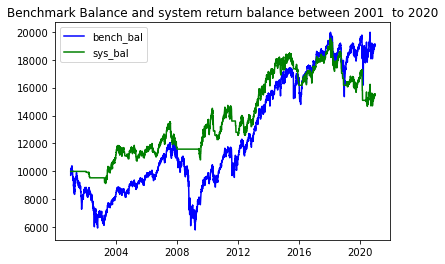

In [39]:
#plotting the benchmark balance and the system balance
plt.plot(price.Bench_Bal,  color='blue', label= 'bench_bal')
plt.plot(price.Sys_Bal, color = 'g', label = 'sys_bal')
plt.title('Benchmark Balance and System Return Balance between 2001  to 2020')
leg = plt.legend();
plt.show()

In [30]:
#Calculating some metrics
sys_return = round(((price.Sys_Return[-1] / price.Sys_Return[0]) -1) *100, 2)*100 # percentage of increase over 20yrs
sys_cagr = round((((price.Sys_Return[-1] / price.Sys_Return[0]) ** (1/YEARS)) -1) *100, 2)*100#compounded annual growth rate
print(sys_return)
print(sys_cagr)

61.0
3.0


In [26]:
#Calculating the drawdown for the sys_bal
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak
sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)#maximum drawback
sys_dd

-24.96

In [31]:
print(f'Benchmark Total Return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark_DD: {bench_dd}%')
print('')
print(f'System Total Return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')

Benchmark Total Return: 96.4%
Benchmark CAGR: 3.43
Benchmark_DD: -52.29%

System Total Return: 61.0%
System CAGR: 3.0
System DD: -24.96%
